In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
df = pd.read_excel('/content/cleaned_imputed_data.xlsx')

data.head()
print(data.columns)

target_columns = ['Bio-oil yield (%)',
       'Syngas yield (%)', 'Syngas composition (H₂, mol%)',
       'Syngas composition (CH₄, mol%)', 'Syngas composition (CO₂, mol%)',
       'Syngas composition (CO, mol%)', 'Biochar yield (%)',
       'Biochar calorific value (MJ/kg)', 'Biochar H/C ratio (-)',
       'Biochar H/N ratio (-)', 'Biochar O/C ratio (-)']

NameError: name 'data' is not defined

In [ ]:


# Load the California Housing dataset
california = fetch_california_housing()
X = california.data
y = california.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the SVR model
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train, y_train)

# Make predictions
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

# Calculate R²
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Calculate RRMSE
rrmse_train = rmse_train / np.mean(y_train)
rrmse_test = rmse_test / np.mean(y_test)

# Create a DataFrame to compare the performance metrics
performance_df = pd.DataFrame({
    'Metric': ['R²', 'RMSE', 'RRMSE'],
    'Training': [r2_train, rmse_train, rrmse_train],
    'Testing': [r2_test, rmse_test, rrmse_test]
})

print(performance_df)


  Metric  Training   Testing
0     R²  0.794794  0.752371
1   RMSE  0.523751  0.569644
2  RRMSE  0.252782  0.277199


In [ ]:
# Step 1: Install necessary libraries (if not already installed)
!pip install pandas openpyxl scikit-learn matplotlib

# Step 2: Upload the dataset
from google.colab import files

# Upload file
uploaded = files.upload()

# Step 3: Read the dataset into a DataFrame
import pandas as pd

# Replace 'your_dataset.xlsx' with the name of your uploaded file


# Display the DataFrame to understand its structure
print("DataFrame Head:")
print(df.head())

# Step 4: Assign variables to X and multiple y variables
# Define your feature columns and target columns
feature_columns = ['Carbon content (wt%)',
       'Hydrogen content (wt%)', 'Nitrogen content (wt%)',
       'Oxygen content (wt%)', 'Sulfur content (wt%)', 'Volatile matter (wt%)',
       'Fixed carbon (wt%)', 'Ash content (wt%)', 'Reaction temperature (°C)',
       'Microwave power (W)', 'Reaction time (min)',
       'Microwave absorber percentage (%)',
       'Dielectric constant of absorber (ε′)',
       'Dielectric loss factor of absorber (ε“)']  # Replace with your actual feature column names
target_columns = ['Syngas yield (%)' ,'Bio-oil yield (%)']  # Replace with your actual target column names

# Assign the feature columns to X and the target columns to y
X = df[feature_columns].values
y = df[target_columns].values

# Display the shapes of X and y to confirm
print("X shape:", X.shape)
print("y shape:", y.shape)

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize lists to store results
train_preds = []
test_preds = []
metrics = []

# Train and predict for each target variable
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

for i, target in enumerate(target_columns):
    svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
    svr.fit(X_train, y_train[:, i])

    # Predictions
    y_train_pred = svr.predict(X_train)
    y_test_pred = svr.predict(X_test)

    train_preds.append(y_train_pred)
    test_preds.append(y_test_pred)

    # Evaluate the model
    r2_train = r2_score(y_train[:, i], y_train_pred)
    r2_test = r2_score(y_test[:, i], y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train[:, i], y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test[:, i], y_test_pred))
    rrmse_train = rmse_train / np.mean(y_train[:, i])
    rrmse_test = rmse_test / np.mean(y_test[:, i])

    metrics.append({
        'Target': target,
        'R² Train': r2_train,
        'R² Test': r2_test,
        'RMSE Train': rmse_train,
        'RMSE Test': rmse_test,
        'RRMSE Train': rrmse_train,
        'RRMSE Test': rrmse_test
    })

# Create a DataFrame to compare the performance metrics
performance_df = pd.DataFrame(metrics)
print(performance_df)

# Gather all predictions together for visualization
train_preds = np.array(train_preds).T
test_preds = np.array(test_preds).T

# Plot the results
import matplotlib.pyplot as plt

for i, target in enumerate(target_columns):
    # Convert actual and predicted values to percentages for plotting
    y_train_percentage = y_train[:, i] * 100
    y_train_pred_percentage = train_preds[:, i] * 100
    y_test_percentage = y_test[:, i] * 100
    y_test_pred_percentage = test_preds[:, i] * 100

    # Create scatter plot to compare predicted vs actual values in percentages
    plt.figure(figsize=(10, 6))
    plt.scatter(y_train_percentage, y_train_pred_percentage, color='blue', alpha=0.5, label='Training data')
    plt.scatter(y_test_percentage, y_test_pred_percentage, color='red', alpha=0.5, label='Testing data')
    plt.plot([y_train_percentage.min(), y_train_percentage.max()], [y_train_percentage.min(), y_train_percentage.max()], 'k--', lw=2)
    plt.xlabel('Actual Values (%)')
    plt.ylabel('Predicted Values (%)')
    plt.title(f'Predicted vs Actual Values for {target} in Percentage')
    plt.legend()
    plt.show()


  Metric  Training   Testing
0     R²  0.915195  0.767129
1   RMSE  5.404144  8.872308
2  RRMSE  0.144605  0.229255


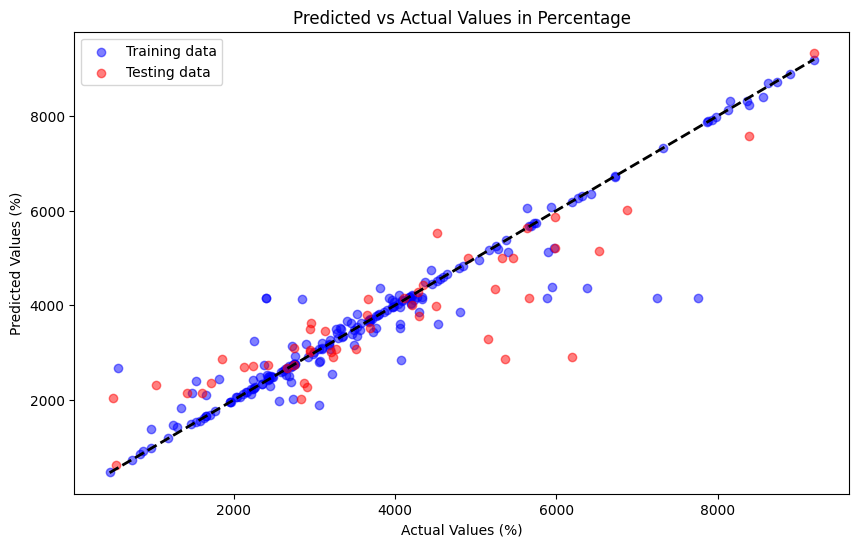

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# Load the California Housing dataset
#california = fetch_california_housing()
#X = california.data
#y = california.target

feature_columns = ['Carbon content (wt%)',
       'Hydrogen content (wt%)', 'Nitrogen content (wt%)',
       'Oxygen content (wt%)', 'Sulfur content (wt%)', 'Volatile matter (wt%)',
       'Fixed carbon (wt%)', 'Ash content (wt%)', 'Reaction temperature (°C)',
       'Microwave power (W)', 'Reaction time (min)',
       'Microwave absorber percentage (%)',
       'Dielectric constant of absorber (ε′)',
       'Dielectric loss factor of absorber (ε“)']  # Replace with your actual feature column names
target_column = 'Syngas yield (%)'  # Replace with your actual target column name

# Assign the feature columns to X and the target column to y
X = df[feature_columns].values
y = df[target_column].values
# Split the dataset into training and testing sets
# focus on the parameter adjustion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the SVR model
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train, y_train)

# Make predictions
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

# Calculate R²
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Calculate RRMSE
rrmse_train = rmse_train / np.mean(y_train)
rrmse_test = rmse_test / np.mean(y_test)

# Create a DataFrame to compare the performance metrics
performance_df = pd.DataFrame({
    'Metric': ['R²', 'RMSE', 'RRMSE'],
    'Training': [r2_train, rmse_train, rrmse_train],
    'Testing': [r2_test, rmse_test, rrmse_test]
})

print(performance_df)

# Convert actual and predicted values to percentages for plotting
y_train_percentage = y_train * 100
y_train_pred_percentage = y_train_pred * 100
y_test_percentage = y_test * 100
y_test_pred_percentage = y_test_pred * 100

# Create scatter plot to compare predicted vs actual values in percentages
plt.figure(figsize=(10, 6))
plt.scatter(y_train_percentage, y_train_pred_percentage, color='blue', alpha=0.5, label='Training data')
plt.scatter(y_test_percentage, y_test_pred_percentage, color='red', alpha=0.5, label='Testing data')
plt.plot([y.min() * 100, y.max() * 100], [y.min() * 100, y.max() * 100], 'k--', lw=2)
plt.xlabel('Actual Values (%)')
plt.ylabel('Predicted Values (%)')
plt.title('Predicted vs Actual Values in Percentage')
plt.legend()
plt.show()


DataFrame Head:
                  Reference (DOI) Biomass type  Carbon content (wt%)  \
0  10.1016/j.apenergy.2020.114855       Sludge                 33.14   
1  10.1016/j.apenergy.2020.114855       Sludge                 33.14   
2  10.1016/j.apenergy.2020.114855       Sludge                 33.14   
3  10.1016/j.apenergy.2020.114855       Sludge                 33.14   
4  10.1016/j.apenergy.2020.114855       Sludge                 33.14   

   Hydrogen content (wt%)  Nitrogen content (wt%)  Oxygen content (wt%)  \
0                    5.58                    4.85                 55.75   
1                    5.58                    4.85                 55.75   
2                    5.58                    4.85                 55.75   
3                    5.58                    4.85                 55.75   
4                    5.58                    4.85                 55.75   

   Sulfur content (wt%)  Volatile matter (wt%)  Fixed carbon (wt%)  \
0                  0.68       

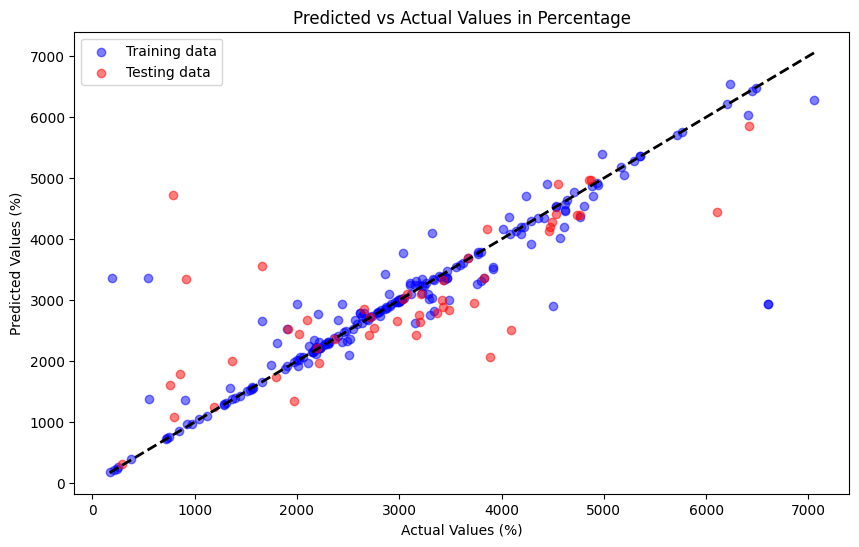

In [ ]:
# Step 1: Install necessary libraries (if not already installed)
!pip install pandas openpyxl scikit-learn matplotlib

# Step 2: Upload the dataset
from google.colab import files

# Upload file
data = pd.read_excel('/content/cleaned_imputed_data.xlsx')

# Step 3: Read the dataset into a DataFrame
import pandas as pd

# Replace 'your_dataset.xlsx' with the name of your uploaded file
df = pd.read_excel('/content/cleaned_imputed_data.xlsx')

# Display the DataFrame to understand its structure
print("DataFrame Head:")
print(df.head())

# Step 4: Assign variables to X and y
# Define your feature columns and target column
feature_columns = ['Carbon content (wt%)',
       'Hydrogen content (wt%)', 'Nitrogen content (wt%)',
       'Oxygen content (wt%)', 'Sulfur content (wt%)', 'Volatile matter (wt%)',
       'Fixed carbon (wt%)', 'Ash content (wt%)', 'Reaction temperature (°C)',
       'Microwave power (W)', 'Reaction time (min)',
       'Microwave absorber percentage (%)',
       'Dielectric constant of absorber (ε′)',
       'Dielectric loss factor of absorber (ε“)']  # Replace with your actual feature column names
target_column = 'Bio-oil yield (%)'  # Replace with your actual target column name

# Assign the feature columns to X and the target column to y
X = df[feature_columns].values
y = df[target_column].values

# Display the shapes of X and y to confirm
print("X shape:", X.shape)
print("y shape:", y.shape)

# Step 5: Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 7: Create and train the SVR model
from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train, y_train)

# Step 8: Make predictions
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

# Step 9: Evaluate the model
from sklearn.metrics import r2_score, mean_squared_error

# Calculate R²
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Calculate RRMSE
rrmse_train = rmse_train / np.mean(y_train)
rrmse_test = rmse_test / np.mean(y_test)

# Create a DataFrame to compare the performance metrics
performance_df = pd.DataFrame({
    'Metric': ['R²', 'RMSE', 'RRMSE'],
    'Training': [r2_train, rmse_train, rrmse_train],
    'Testing': [r2_test, rmse_test, rrmse_test]
})

print(performance_df)

# Step 10: Visualize the predictions vs actual values in percentage
import matplotlib.pyplot as plt

# Convert actual and predicted values to percentages for plotting
y_train_percentage = y_train * 100
y_train_pred_percentage = y_train_pred * 100
y_test_percentage = y_test * 100
y_test_pred_percentage = y_test_pred * 100

# Create scatter plot to compare predicted vs actual values in percentages
plt.figure(figsize=(10, 6))
plt.scatter(y_train_percentage, y_train_pred_percentage, color='blue', alpha=0.5, label='Training data')
plt.scatter(y_test_percentage, y_test_pred_percentage, color='red', alpha=0.5, label='Testing data')
plt.plot([y.min() * 100, y.max() * 100], [y.min() * 100, y.max() * 100], 'k--', lw=2)
plt.xlabel('Actual Values (%)')
plt.ylabel('Predicted Values (%)')
plt.title('Predicted vs Actual Values in Percentage')
plt.legend()
plt.show()


  Metric  Training   Testing
0     R²  0.915195  0.767129
1   RMSE  5.404144  8.872308
2  RRMSE  0.144605  0.229255


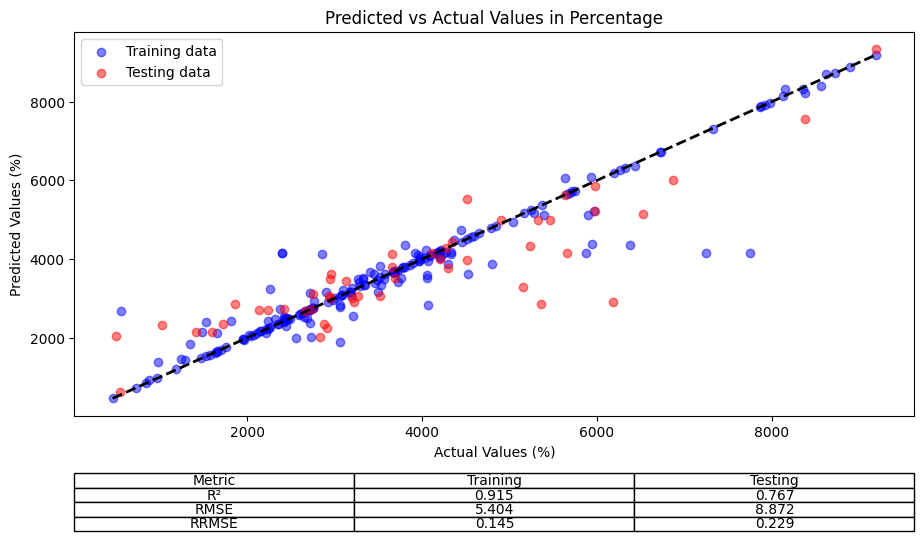

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# Assuming `df` is already defined as your DataFrame
# Replace the following line with the actual code to load your data if not already done
# df = pd.read_csv('your_data.csv')

feature_columns = ['Carbon content (wt%)',
                   'Hydrogen content (wt%)', 'Nitrogen content (wt%)',
                   'Oxygen content (wt%)', 'Sulfur content (wt%)', 'Volatile matter (wt%)',
                   'Fixed carbon (wt%)', 'Ash content (wt%)', 'Reaction temperature (°C)',
                   'Microwave power (W)', 'Reaction time (min)',
                   'Microwave absorber percentage (%)',
                   'Dielectric constant of absorber (ε′)',
                   'Dielectric loss factor of absorber (ε“)']  # Replace with your actual feature column names
target_column = 'Syngas yield (%)'  # Replace with your actual target column name

# Assign the feature columns to X and the target column to y
X = df[feature_columns].values
y = df[target_column].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the SVR model
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train, y_train)

# Make predictions
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

# Calculate R²
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Calculate RRMSE
rrmse_train = rmse_train / np.mean(y_train)
rrmse_test = rmse_test / np.mean(y_test)

# Create a DataFrame to compare the performance metrics
performance_df = pd.DataFrame({
    'Metric': ['R²', 'RMSE', 'RRMSE'],
    'Training': [r2_train, rmse_train, rrmse_train],
    'Testing': [r2_test, rmse_test, rrmse_test]
})

print(performance_df)

# Convert actual and predicted values to percentages for plotting
y_train_percentage = y_train * 100
y_train_pred_percentage = y_train_pred * 100
y_test_percentage = y_test * 100
y_test_pred_percentage = y_test_pred * 100

# Create scatter plot to compare predicted vs actual values in percentages
plt.figure(figsize=(12, 8))
plt.scatter(y_train_percentage, y_train_pred_percentage, color='blue', alpha=0.5, label='Training data')
plt.scatter(y_test_percentage, y_test_pred_percentage, color='red', alpha=0.5, label='Testing data')
plt.plot([min(y) * 100, max(y) * 100], [min(y) * 100, max(y) * 100], 'k--', lw=2)
plt.xlabel('Actual Values (%)')
plt.ylabel('Predicted Values (%)')
plt.title('Predicted vs Actual Values in Percentage')
plt.legend()

# Add table with performance metrics
table_data = [['R²', f'{r2_train:.3f}', f'{r2_test:.3f}'],
              ['RMSE', f'{rmse_train:.3f}', f'{rmse_test:.3f}'],
              ['RRMSE', f'{rrmse_train:.3f}', f'{rrmse_test:.3f}']]
table = plt.table(cellText=table_data,
                  colLabels=['Metric', 'Training', 'Testing'],
                  cellLoc='center',
                  loc='bottom',
                  bbox=[0.0, -0.3, 1, 0.15])  # Adjust bbox to control position and size

# Adjust layout to make room for the table
plt.subplots_adjust(left=0.2, bottom=0.4)

# Reduce font size for the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)  # Scale the table size

plt.show()


  Metric  Training   Testing
0     R²  0.915195  0.767129
1   RMSE  5.404144  8.872308
2  RRMSE  0.144605  0.229255


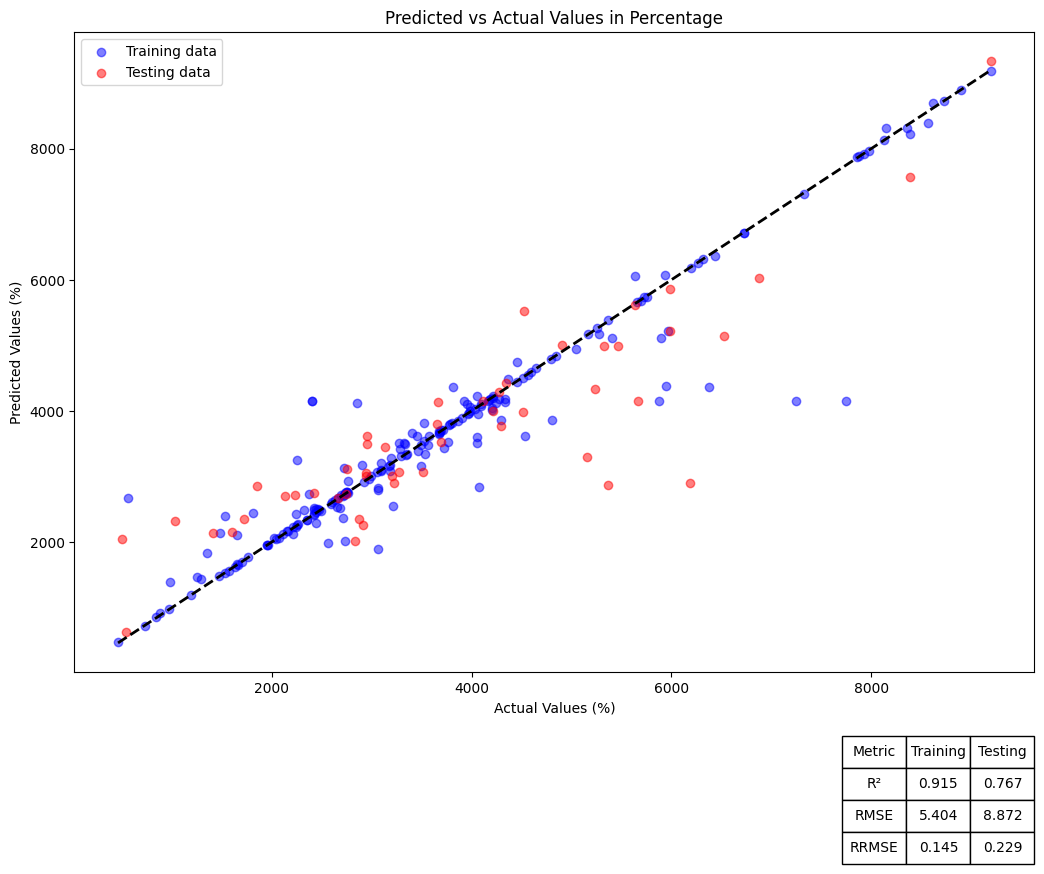

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# Assuming `df` is already defined as your DataFrame
# Replace the following line with the actual code to load your data if not already done
# df = pd.read_csv('your_data.csv')

feature_columns = ['Carbon content (wt%)',
                   'Hydrogen content (wt%)', 'Nitrogen content (wt%)',
                   'Oxygen content (wt%)', 'Sulfur content (wt%)', 'Volatile matter (wt%)',
                   'Fixed carbon (wt%)', 'Ash content (wt%)', 'Reaction temperature (°C)',
                   'Microwave power (W)', 'Reaction time (min)',
                   'Microwave absorber percentage (%)',
                   'Dielectric constant of absorber (ε′)',
                   'Dielectric loss factor of absorber (ε“)']  # Replace with your actual feature column names
target_column = 'Syngas yield (%)'  # Replace with your actual target column name

# Assign the feature columns to X and the target column to y
X = df[feature_columns].values
y = df[target_column].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the SVR model
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train, y_train)

# Make predictions
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

# Calculate R²
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Calculate RRMSE
rrmse_train = rmse_train / np.mean(y_train)
rrmse_test = rmse_test / np.mean(y_test)

# Create a DataFrame to compare the performance metrics
performance_df = pd.DataFrame({
    'Metric': ['R²', 'RMSE', 'RRMSE'],
    'Training': [r2_train, rmse_train, rrmse_train],
    'Testing': [r2_test, rmse_test, rrmse_test]
})

print(performance_df)

# Convert actual and predicted values to percentages for plotting
y_train_percentage = y_train * 100
y_train_pred_percentage = y_train_pred * 100
y_test_percentage = y_test * 100
y_test_pred_percentage = y_test_pred * 100

# Create scatter plot to compare predicted vs actual values in percentages
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(y_train_percentage, y_train_pred_percentage, color='blue', alpha=0.5, label='Training data')
ax.scatter(y_test_percentage, y_test_pred_percentage, color='red', alpha=0.5, label='Testing data')
ax.plot([min(y) * 100, max(y) * 100], [min(y) * 100, max(y) * 100], 'k--', lw=2)
ax.set_xlabel('Actual Values (%)')
ax.set_ylabel('Predicted Values (%)')
ax.set_title('Predicted vs Actual Values in Percentage')
ax.legend()

# Add table with performance metrics
table_data = [['R²', f'{r2_train:.3f}', f'{r2_test:.3f}'],
              ['RMSE', f'{rmse_train:.3f}', f'{rmse_test:.3f}'],
              ['RRMSE', f'{rrmse_train:.3f}', f'{rrmse_test:.3f}']]
table = ax.table(cellText=table_data,
                 colLabels=['Metric', 'Training', 'Testing'],
                 cellLoc='center',
                 loc='lower right',
                 bbox=[0.8, -0.3, 0.2, 0.2])  # Adjust bbox to control position and size

# Adjust layout to make room for the table
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Reduce font size for the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)  # Scale the table size

plt.show()


  Metric  Training   Testing
0     R²  0.915195  0.767129
1   RMSE  5.404144  8.872308
2  RRMSE  0.144605  0.229255


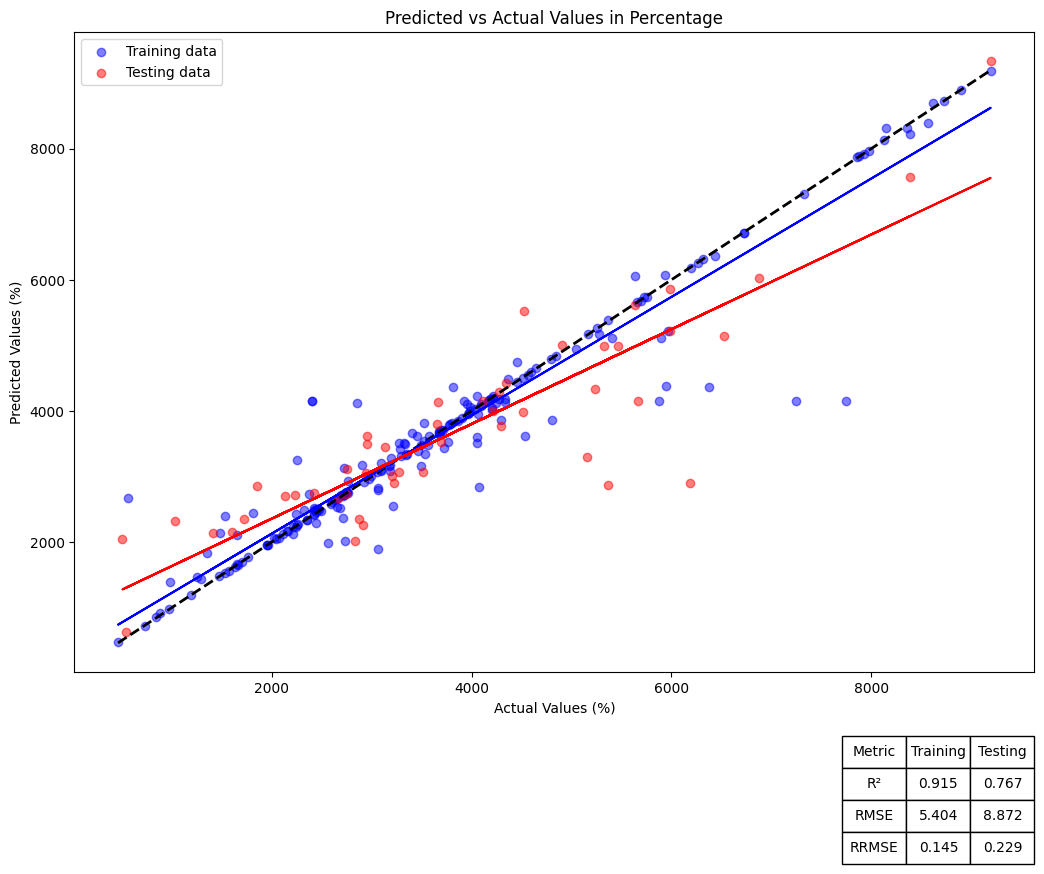

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# Assuming `df` is already defined as your DataFrame
# Replace the following line with the actual code to load your data if not already done
# df = pd.read_csv('your_data.csv')

feature_columns = ['Carbon content (wt%)',
                   'Hydrogen content (wt%)', 'Nitrogen content (wt%)',
                   'Oxygen content (wt%)', 'Sulfur content (wt%)', 'Volatile matter (wt%)',
                   'Fixed carbon (wt%)', 'Ash content (wt%)', 'Reaction temperature (°C)',
                   'Microwave power (W)', 'Reaction time (min)',
                   'Microwave absorber percentage (%)',
                   'Dielectric constant of absorber (ε′)',
                   'Dielectric loss factor of absorber (ε“)']  # Replace with your actual feature column names
target_column = 'Syngas yield (%)'  # Replace with your actual target column name

# Assign the feature columns to X and the target column to y
X = df[feature_columns].values
y = df[target_column].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the SVR model
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train, y_train)

# Make predictions
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

# Calculate R²
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Calculate RRMSE
rrmse_train = rmse_train / np.mean(y_train)
rrmse_test = rmse_test / np.mean(y_test)

# Create a DataFrame to compare the performance metrics
performance_df = pd.DataFrame({
    'Metric': ['R²', 'RMSE', 'RRMSE'],
    'Training': [r2_train, rmse_train, rrmse_train],
    'Testing': [r2_test, rmse_test, rrmse_test]
})

print(performance_df)

# Convert actual and predicted values to percentages for plotting
y_train_percentage = y_train * 100
y_train_pred_percentage = y_train_pred * 100
y_test_percentage = y_test * 100
y_test_pred_percentage = y_test_pred * 100

# Create scatter plot to compare predicted vs actual values in percentages
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(y_train_percentage, y_train_pred_percentage, color='blue', alpha=0.5, label='Training data')
ax.scatter(y_test_percentage, y_test_pred_percentage, color='red', alpha=0.5, label='Testing data')
ax.plot([min(y) * 100, max(y) * 100], [min(y) * 100, max(y) * 100], 'k--', lw=2)
ax.set_xlabel('Actual Values (%)')
ax.set_ylabel('Predicted Values (%)')
ax.set_title('Predicted vs Actual Values in Percentage')
ax.legend()

# Add table with performance metrics
table_data = [['R²', f'{r2_train:.3f}', f'{r2_test:.3f}'],
              ['RMSE', f'{rmse_train:.3f}', f'{rmse_test:.3f}'],
              ['RRMSE', f'{rrmse_train:.3f}', f'{rrmse_test:.3f}']]
table = ax.table(cellText=table_data,
                 colLabels=['Metric', 'Training', 'Testing'],
                 cellLoc='center',
                 loc='lower right',
                 bbox=[0.8, -0.3, 0.2, 0.2])  # Adjust bbox to control position and size

# Add trend lines
# Training data trend line
train_polyfit = np.polyfit(y_train_percentage, y_train_pred_percentage, 1)
train_polyval = np.polyval(train_polyfit, y_train_percentage)
ax.plot(y_train_percentage, train_polyval, color='blue', label='Training trend line')

# Testing data trend line
test_polyfit = np.polyfit(y_test_percentage, y_test_pred_percentage, 1)
test_polyval = np.polyval(test_polyfit, y_test_percentage)
ax.plot(y_test_percentage, test_polyval, color='red', label='Testing trend line')

# Adjust layout to make room for the table
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Reduce font size for the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)  # Scale the table size

plt.show()


  Metric  Training   Testing
0     R²  0.915195  0.767129
1   RMSE  5.404144  8.872308
2  RRMSE  0.144605  0.229255


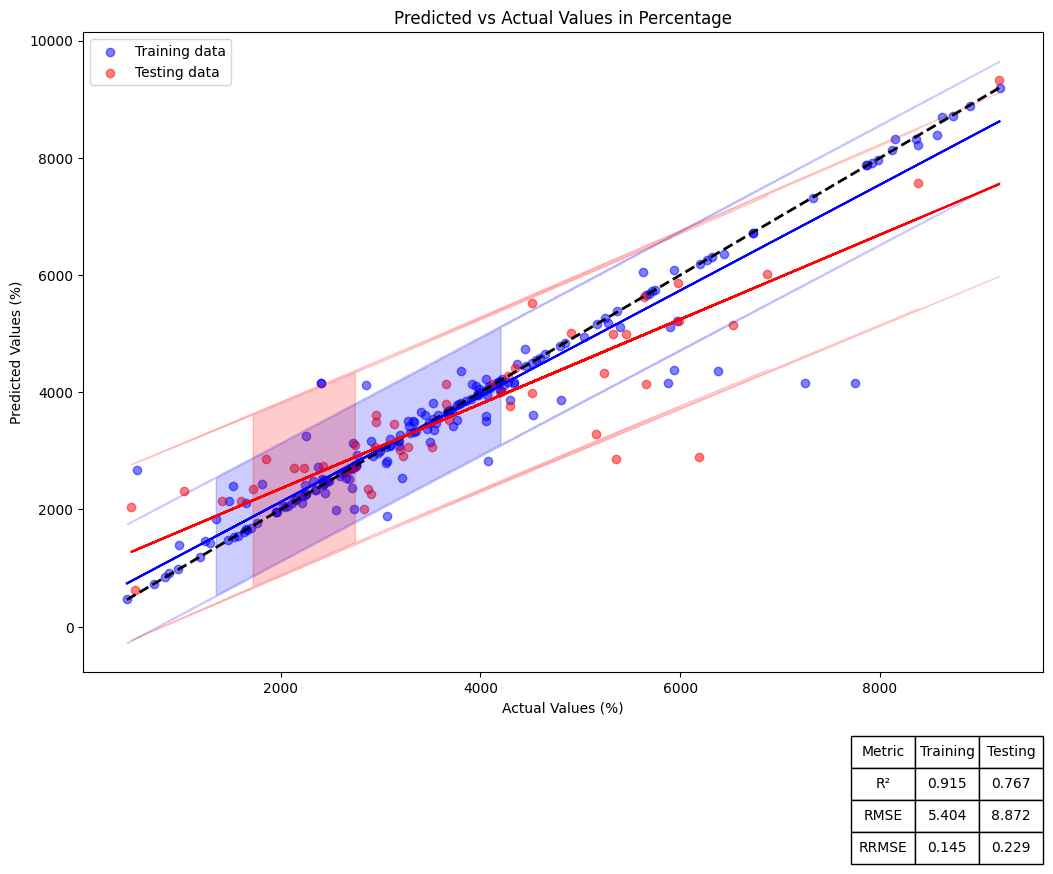

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import t

# Assuming `df` is already defined as your DataFrame
# Replace the following line with the actual code to load your data if not already done
# df = pd.read_csv('your_data.csv')

feature_columns = ['Carbon content (wt%)',
                   'Hydrogen content (wt%)', 'Nitrogen content (wt%)',
                   'Oxygen content (wt%)', 'Sulfur content (wt%)', 'Volatile matter (wt%)',
                   'Fixed carbon (wt%)', 'Ash content (wt%)', 'Reaction temperature (°C)',
                   'Microwave power (W)', 'Reaction time (min)',
                   'Microwave absorber percentage (%)',
                   'Dielectric constant of absorber (ε′)',
                   'Dielectric loss factor of absorber (ε“)']  # Replace with your actual feature column names
target_column = 'Syngas yield (%)'  # Replace with your actual target column name

# Assign the feature columns to X and the target column to y
X = df[feature_columns].values
y = df[target_column].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the SVR model
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train, y_train)

# Make predictions
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

# Calculate R²
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Calculate RRMSE
rrmse_train = rmse_train / np.mean(y_train)
rrmse_test = rmse_test / np.mean(y_test)

# Create a DataFrame to compare the performance metrics
performance_df = pd.DataFrame({
    'Metric': ['R²', 'RMSE', 'RRMSE'],
    'Training': [r2_train, rmse_train, rrmse_train],
    'Testing': [r2_test, rmse_test, rrmse_test]
})

print(performance_df)

# Convert actual and predicted values to percentages for plotting
y_train_percentage = y_train * 100
y_train_pred_percentage = y_train_pred * 100
y_test_percentage = y_test * 100
y_test_pred_percentage = y_test_pred * 100

# Create scatter plot to compare predicted vs actual values in percentages
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(y_train_percentage, y_train_pred_percentage, color='blue', alpha=0.5, label='Training data')
ax.scatter(y_test_percentage, y_test_pred_percentage, color='red', alpha=0.5, label='Testing data')
ax.plot([min(y) * 100, max(y) * 100], [min(y) * 100, max(y) * 100], 'k--', lw=2)
ax.set_xlabel('Actual Values (%)')
ax.set_ylabel('Predicted Values (%)')
ax.set_title('Predicted vs Actual Values in Percentage')
ax.legend()

# Add table with performance metrics
table_data = [['R²', f'{r2_train:.3f}', f'{r2_test:.3f}'],
              ['RMSE', f'{rmse_train:.3f}', f'{rmse_test:.3f}'],
              ['RRMSE', f'{rrmse_train:.3f}', f'{rrmse_test:.3f}']]
table = ax.table(cellText=table_data,
                 colLabels=['Metric', 'Training', 'Testing'],
                 cellLoc='center',
                 loc='lower right',
                 bbox=[0.8, -0.3, 0.2, 0.2])  # Adjust bbox to control position and size

# Function to calculate confidence intervals
def confidence_interval(x, y, polyfit, alpha=0.05):
    p = np.poly1d(polyfit)
    yhat = p(x)
    n = len(y)
    residual = y - yhat
    std_error = (np.sum(residual**2) / (n - 2))**0.5
    t_val = t.ppf(1 - alpha/2, n - 2)
    ci = t_val * std_error * (1 + (x - np.mean(x))**2 / np.sum((x - np.mean(x))**2))**0.5
    return yhat - ci, yhat + ci

# Training data trend line and confidence interval
train_polyfit = np.polyfit(y_train_percentage, y_train_pred_percentage, 1)
train_polyval = np.polyval(train_polyfit, y_train_percentage)
train_ci_lower, train_ci_upper = confidence_interval(y_train_percentage, y_train_pred_percentage, train_polyfit)
ax.plot(y_train_percentage, train_polyval, color='blue', label='Training trend line')
ax.fill_between(y_train_percentage, train_ci_lower, train_ci_upper, color='blue', alpha=0.2)

# Testing data trend line and confidence interval
test_polyfit = np.polyfit(y_test_percentage, y_test_pred_percentage, 1)
test_polyval = np.polyval(test_polyfit, y_test_percentage)
test_ci_lower, test_ci_upper = confidence_interval(y_test_percentage, y_test_pred_percentage, test_polyfit)
ax.plot(y_test_percentage, test_polyval, color='red', label='Testing trend line')
ax.fill_between(y_test_percentage, test_ci_lower, test_ci_upper, color='red', alpha=0.2)

# Adjust layout to make room for the table
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Reduce font size for the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)  # Scale the table size

plt.show()


  Metric  Training   Testing
0     R²  0.915195  0.767129
1   RMSE  5.404144  8.872308
2  RRMSE  0.144605  0.229255


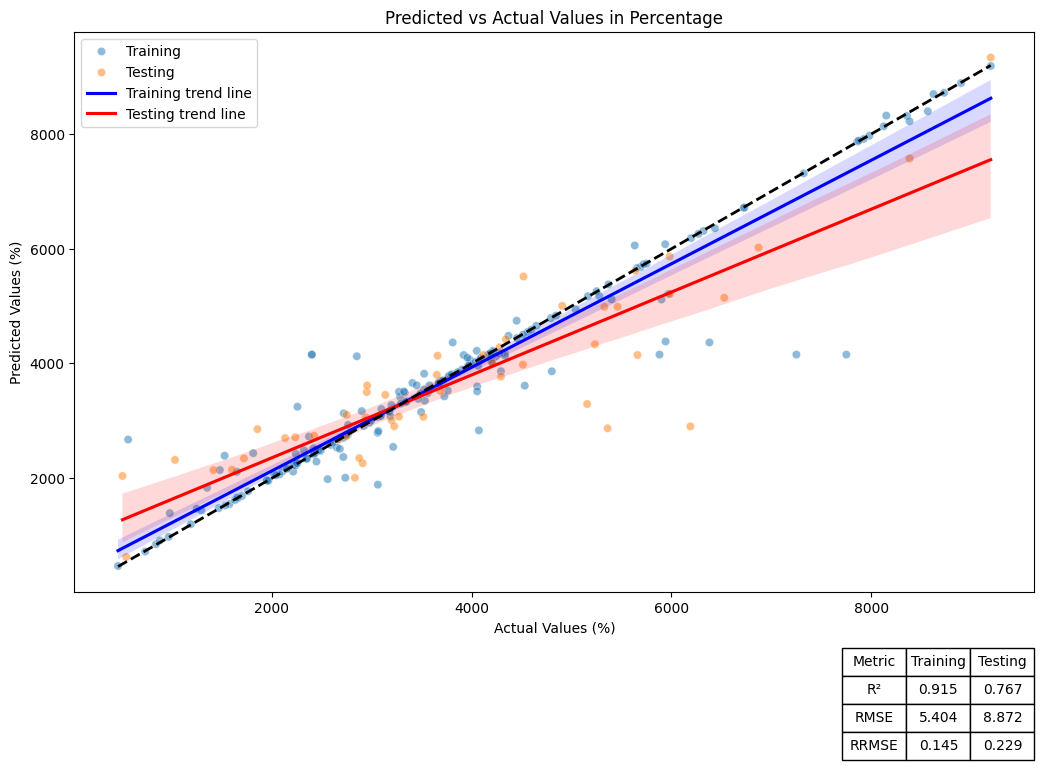

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# Assuming `df` is already defined as your DataFrame
# Replace the following line with the actual code to load your data if not already done
# df = pd.read_csv('your_data.csv')

feature_columns = ['Carbon content (wt%)',
                   'Hydrogen content (wt%)', 'Nitrogen content (wt%)',
                   'Oxygen content (wt%)', 'Sulfur content (wt%)', 'Volatile matter (wt%)',
                   'Fixed carbon (wt%)', 'Ash content (wt%)', 'Reaction temperature (°C)',
                   'Microwave power (W)', 'Reaction time (min)',
                   'Microwave absorber percentage (%)',
                   'Dielectric constant of absorber (ε′)',
                   'Dielectric loss factor of absorber (ε“)']  # Replace with your actual feature column names
target_column = 'Syngas yield (%)'  # Replace with your actual target column name

# Assign the feature columns to X and the target column to y
X = df[feature_columns].values
y = df[target_column].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the SVR model
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train, y_train)

# Make predictions
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

# Calculate R²
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Calculate RRMSE
rrmse_train = rmse_train / np.mean(y_train)
rrmse_test = rmse_test / np.mean(y_test)

# Create a DataFrame to compare the performance metrics
performance_df = pd.DataFrame({
    'Metric': ['R²', 'RMSE', 'RRMSE'],
    'Training': [r2_train, rmse_train, rrmse_train],
    'Testing': [r2_test, rmse_test, rrmse_test]
})

print(performance_df)

# Convert actual and predicted values to percentages for plotting
y_train_percentage = y_train * 100
y_train_pred_percentage = y_train_pred * 100
y_test_percentage = y_test * 100
y_test_pred_percentage = y_test_pred * 100

# Combine data into a DataFrame for plotting with seaborn
df_plot = pd.DataFrame({
    'Actual': np.concatenate((y_train_percentage, y_test_percentage)),
    'Predicted': np.concatenate((y_train_pred_percentage, y_test_pred_percentage)),
    'Dataset': ['Training'] * len(y_train_percentage) + ['Testing'] * len(y_test_percentage)
})

# Create scatter plot with regression line
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_plot, x='Actual', y='Predicted', hue='Dataset', alpha=0.5)
sns.regplot(data=df_plot[df_plot['Dataset'] == 'Training'], x='Actual', y='Predicted', scatter=False, color='blue', label='Training trend line')
sns.regplot(data=df_plot[df_plot['Dataset'] == 'Testing'], x='Actual', y='Predicted', scatter=False, color='red', label='Testing trend line')

# Add diagonal line
plt.plot([min(y) * 100, max(y) * 100], [min(y) * 100, max(y) * 100], 'k--', lw=2)

# Add labels and title
plt.xlabel('Actual Values (%)')
plt.ylabel('Predicted Values (%)')
plt.title('Predicted vs Actual Values in Percentage')
plt.legend()

# Add table with performance metrics
table_data = [['R²', f'{r2_train:.3f}', f'{r2_test:.3f}'],
              ['RMSE', f'{rmse_train:.3f}', f'{rmse_test:.3f}'],
              ['RRMSE', f'{rrmse_train:.3f}', f'{rrmse_test:.3f}']]
table = plt.table(cellText=table_data,
                  colLabels=['Metric', 'Training', 'Testing'],
                  cellLoc='center',
                  loc='bottom',
                  bbox=[0.8, -0.3, 0.2, 0.2])  # Adjust bbox to control position and size

# Adjust layout to make room for the table
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)

# Reduce font size for the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)  # Scale the table size

plt.show()


  Metric  Training   Testing
0     R²  0.915195  0.767129
1   RMSE  5.404144  8.872308
2  RRMSE  0.144605  0.229255


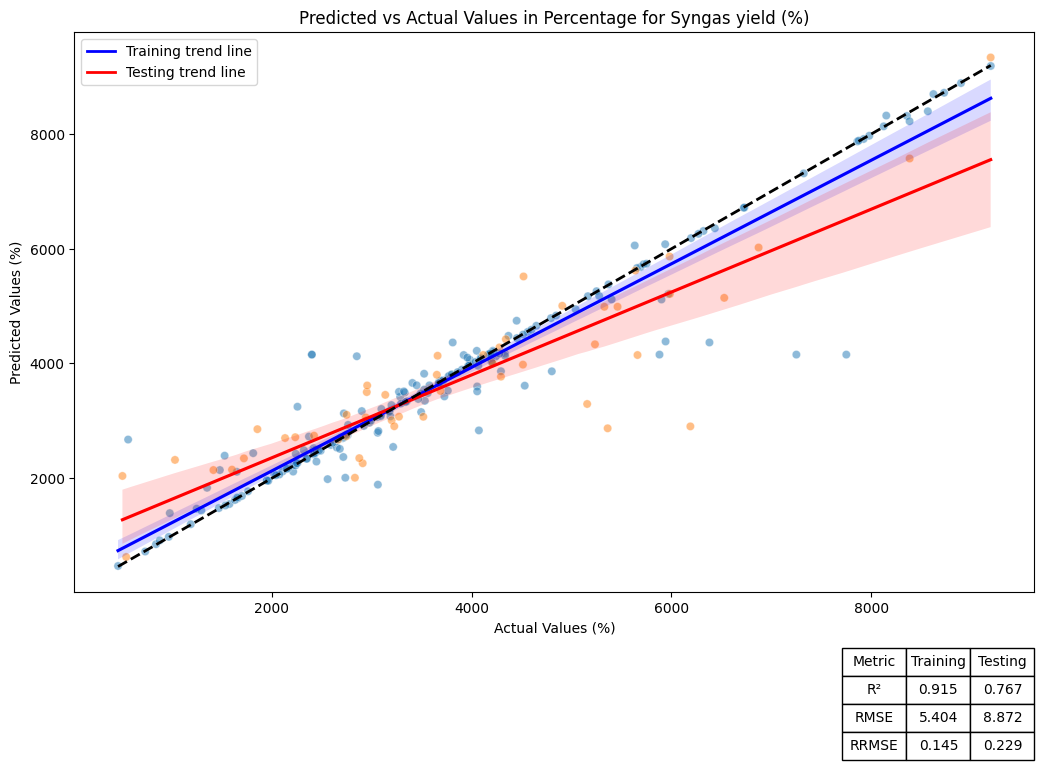

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# Assuming `df` is already defined as your DataFrame
# Replace the following line with the actual code to load your data if not already done
# df = pd.read_csv('your_data.csv')

feature_columns = ['Carbon content (wt%)',
                   'Hydrogen content (wt%)', 'Nitrogen content (wt%)',
                   'Oxygen content (wt%)', 'Sulfur content (wt%)', 'Volatile matter (wt%)',
                   'Fixed carbon (wt%)', 'Ash content (wt%)', 'Reaction temperature (°C)',
                   'Microwave power (W)', 'Reaction time (min)',
                   'Microwave absorber percentage (%)',
                   'Dielectric constant of absorber (ε′)',
                   'Dielectric loss factor of absorber (ε“)']  # Replace with your actual feature column names
target_column = 'Syngas yield (%)'  # Replace with your actual target column name

# Assign the feature columns to X and the target column to y
X = df[feature_columns].values
y = df[target_column].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the SVR model
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train, y_train)

# Make predictions
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

# Calculate R²
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Calculate RRMSE
rrmse_train = rmse_train / np.mean(y_train)
rrmse_test = rmse_test / np.mean(y_test)

# Create a DataFrame to compare the performance metrics
performance_df = pd.DataFrame({
    'Metric': ['R²', 'RMSE', 'RRMSE'],
    'Training': [r2_train, rmse_train, rrmse_train],
    'Testing': [r2_test, rmse_test, rrmse_test]
})

print(performance_df)

# Convert actual and predicted values to percentages for plotting
y_train_percentage = y_train * 100
y_train_pred_percentage = y_train_pred * 100
y_test_percentage = y_test * 100
y_test_pred_percentage = y_test_pred * 100

# Combine data into a DataFrame for plotting with seaborn
df_plot = pd.DataFrame({
    'Actual': np.concatenate((y_train_percentage, y_test_percentage)),
    'Predicted': np.concatenate((y_train_pred_percentage, y_test_pred_percentage)),
    'Dataset': ['Training'] * len(y_train_percentage) + ['Testing'] * len(y_test_percentage)
})

# Create scatter plot with regression line
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_plot, x='Actual', y='Predicted', hue='Dataset', alpha=0.5)

# Training data trend line and confidence interval
sns.regplot(data=df_plot[df_plot['Dataset'] == 'Training'], x='Actual', y='Predicted', scatter=False, color='blue', label='Training trend line')

# Testing data trend line and confidence interval
sns.regplot(data=df_plot[df_plot['Dataset'] == 'Testing'], x='Actual', y='Predicted', scatter=False, color='red', label='Testing trend line')

# Add diagonal line
plt.plot([min(y) * 100, max(y) * 100], [min(y) * 100, max(y) * 100], 'k--', lw=2)

# Add labels and title with target column
plt.xlabel('Actual Values (%)')
plt.ylabel('Predicted Values (%)')
plt.title(f'Predicted vs Actual Values in Percentage for {target_column}')
plt.legend()

# Create custom legend
custom_lines = [plt.Line2D([0], [0], color='blue', lw=2),
                plt.Line2D([0], [0], color='red', lw=2)]
plt.legend(custom_lines, ['Training trend line', 'Testing trend line'])

# Add table with performance metrics
table_data = [['R²', f'{r2_train:.3f}', f'{r2_test:.3f}'],
              ['RMSE', f'{rmse_train:.3f}', f'{rmse_test:.3f}'],
              ['RRMSE', f'{rrmse_train:.3f}', f'{rrmse_test:.3f}']]
table = plt.table(cellText=table_data,
                  colLabels=['Metric', 'Training', 'Testing'],
                  cellLoc='center',
                  loc='bottom',
                  bbox=[0.8, -0.3, 0.2, 0.2])  # Adjust bbox to control position and size

# Adjust layout to make room for the table
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)

# Reduce font size for the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)  # Scale the table size

plt.show()


  Metric  Training   Testing
0     R²  0.915195  0.767129
1   RMSE  5.404144  8.872308
2  RRMSE  0.144605  0.229255


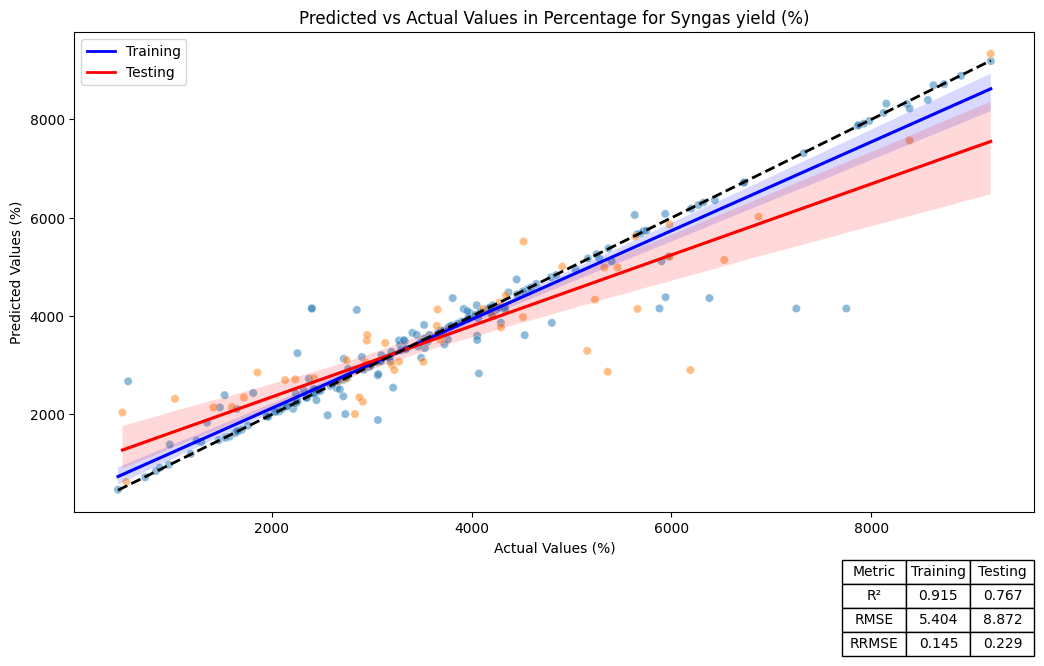

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# Assuming `df` is already defined as your DataFrame
# Replace the following line with the actual code to load your data if not already done
# df = pd.read_csv('your_data.csv')

feature_columns = ['Carbon content (wt%)',
                   'Hydrogen content (wt%)', 'Nitrogen content (wt%)',
                   'Oxygen content (wt%)', 'Sulfur content (wt%)', 'Volatile matter (wt%)',
                   'Fixed carbon (wt%)', 'Ash content (wt%)', 'Reaction temperature (°C)',
                   'Microwave power (W)', 'Reaction time (min)',
                   'Microwave absorber percentage (%)',
                   'Dielectric constant of absorber (ε′)',
                   'Dielectric loss factor of absorber (ε“)']  # Replace with your actual feature column names
target_column = 'Syngas yield (%)'  # Replace with your actual target column name

# Assign the feature columns to X and the target column to y
X = df[feature_columns].values
y = df[target_column].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the SVR model
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train, y_train)

# Make predictions
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

# Calculate R²
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Calculate RRMSE
rrmse_train = rmse_train / np.mean(y_train)
rrmse_test = rmse_test / np.mean(y_test)

# Create a DataFrame to compare the performance metrics
performance_df = pd.DataFrame({
    'Metric': ['R²', 'RMSE', 'RRMSE'],
    'Training': [r2_train, rmse_train, rrmse_train],
    'Testing': [r2_test, rmse_test, rrmse_test]
})

print(performance_df)

# Convert actual and predicted values to percentages for plotting
y_train_percentage = y_train * 100
y_train_pred_percentage = y_train_pred * 100
y_test_percentage = y_test * 100
y_test_pred_percentage = y_test_pred * 100

# Combine data into a DataFrame for plotting with seaborn
df_plot = pd.DataFrame({
    'Actual': np.concatenate((y_train_percentage, y_test_percentage)),
    'Predicted': np.concatenate((y_train_pred_percentage, y_test_pred_percentage)),
    'Dataset': ['Training'] * len(y_train_percentage) + ['Testing'] * len(y_test_percentage)
})

# Create scatter plot with regression line
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_plot, x='Actual', y='Predicted', hue='Dataset', alpha=0.5)

# Training data trend line and confidence interval
sns.regplot(data=df_plot[df_plot['Dataset'] == 'Training'], x='Actual', y='Predicted', scatter=False, color='blue', label='Training trend line')

# Testing data trend line and confidence interval
sns.regplot(data=df_plot[df_plot['Dataset'] == 'Testing'], x='Actual', y='Predicted', scatter=False, color='red', label='Testing trend line')

# Add diagonal line
plt.plot([min(y) * 100, max(y) * 100], [min(y) * 100, max(y) * 100], 'k--', lw=2)

# Add labels and title with target column
plt.xlabel('Actual Values (%)')
plt.ylabel('Predicted Values (%)')
plt.title(f'Predicted vs Actual Values in Percentage for {target_column}')

# Create custom legend with both training and testing labels
custom_lines = [plt.Line2D([0], [0], color='blue', lw=2),
                plt.Line2D([0], [0], color='red', lw=2)]
plt.legend(custom_lines, ['Training', 'Testing'])

# Add table with performance metrics
table_data = [['R²', f'{r2_train:.3f}', f'{r2_test:.3f}'],
              ['RMSE', f'{rmse_train:.3f}', f'{rmse_test:.3f}'],
              ['RRMSE', f'{rrmse_train:.3f}', f'{rrmse_test:.3f}']]
table = plt.table(cellText=table_data,
                  colLabels=['Metric', 'Training', 'Testing'],
                  cellLoc='center',
                  loc='bottom',
                  bbox=[0.8, -0.3, 0.2, 0.2])  # Adjust bbox to control position and size

# Adjust layout to make room for the table
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.3)

# Reduce font size for the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)  # Scale the table size

plt.show()


Now, put this into a function


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

def plot_predicted_vs_actual(df, feature_columns, target_column):
    # Assign the feature columns to X and the target column to y
    X = df[feature_columns].values
    y = df[target_column].values

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Create and train the SVR model
    svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
    svr.fit(X_train, y_train)

    # Make predictions
    y_train_pred = svr.predict(X_train)
    y_test_pred = svr.predict(X_test)

    # Calculate R²
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Calculate RMSE
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # Calculate RRMSE
    rrmse_train = rmse_train / np.mean(y_train)
    rrmse_test = rmse_test / np.mean(y_test)

    # Convert actual and predicted values to percentages for plotting
    y_train_percentage = y_train * 100
    y_train_pred_percentage = y_train_pred * 100
    y_test_percentage = y_test * 100
    y_test_pred_percentage = y_test_pred * 100

    # Combine data into a DataFrame for plotting with seaborn
    df_plot = pd.DataFrame({
        'Actual': np.concatenate((y_train_percentage, y_test_percentage)),
        'Predicted': np.concatenate((y_train_pred_percentage, y_test_pred_percentage)),
        'Dataset': ['Training'] * len(y_train_percentage) + ['Testing'] * len(y_test_percentage)
    })

    # Create scatter plot with regression line
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=df_plot, x='Actual', y='Predicted', hue='Dataset', alpha=0.5)

    # Training data trend line and confidence interval
    sns.regplot(data=df_plot[df_plot['Dataset'] == 'Training'], x='Actual', y='Predicted', scatter=False, color='blue', label='Training trend line')

    # Testing data trend line and confidence interval
    sns.regplot(data=df_plot[df_plot['Dataset'] == 'Testing'], x='Actual', y='Predicted', scatter=False, color='red', label='Testing trend line')

    # Add diagonal line
    plt.plot([min(y) * 100, max(y) * 100], [min(y) * 100, max(y) * 100], 'k--', lw=2)

    # Add labels and title with target column
    plt.xlabel('Actual Values (%)')
    plt.ylabel('Predicted Values (%)')
    plt.title(f'Predicted vs Actual Values in Percentage for {target_column}')

    # Create custom legend with both training and testing labels
    custom_lines = [plt.Line2D([0], [0], color='blue', lw=2),
                    plt.Line2D([0], [0], color='red', lw=2)]
    plt.legend(custom_lines, ['Training', 'Testing'])

    # Add table with performance metrics
    table_data = [['R²', f'{r2_train:.3f}', f'{r2_test:.3f}'],
                  ['RMSE', f'{rmse_train:.3f}', f'{rmse_test:.3f}'],
                  ['RRMSE', f'{rrmse_train:.3f}', f'{rrmse_test:.3f}']]
    table = plt.table(cellText=table_data,
                      colLabels=['Metric', 'Training', 'Testing'],
                      cellLoc='center',
                      loc='bottom',
                      bbox=[0.8, -0.3, 0.2, 0.2])  # Adjust bbox to control position and size

    # Adjust layout to make room for the table
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.3)

    # Reduce font size for the table
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)  # Scale the table size

    plt.show()

# Example usage:
# Replace with your actual DataFrame and columns
# df = pd.read_csv('your_data.csv')
# feature_columns = ['feature1', 'feature2', ...]
# target_column = 'target_column'
# plot_predicted_vs_actual(df, feature_columns, target_column)


here to testify to print the graph together


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

def plot_predicted_vs_actual_multi(df, feature_columns, target_columns):
    num_cols = len(target_columns)
    fig, axs = plt.subplots(num_cols, 1, figsize=(12, 8*num_cols))

    for idx, target_column in enumerate(target_columns):
        # Assign the feature columns to X and the target column to y
        X = df[feature_columns].values
        y = df[target_column].values

        # Split the dataset into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Standardize the features
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        # Create and train the SVR model
        svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
        svr.fit(X_train, y_train)

        # Make predictions
        y_train_pred = svr.predict(X_train)
        y_test_pred = svr.predict(X_test)

        # Calculate R²
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)

        # Calculate RMSE
        rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
        rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

        # Calculate RRMSE
        rrmse_train = rmse_train / np.mean(y_train)
        rrmse_test = rmse_test / np.mean(y_test)

        # Convert actual and predicted values to percentages for plotting
        y_train_percentage = y_train * 100
        y_train_pred_percentage = y_train_pred * 100
        y_test_percentage = y_test * 100
        y_test_pred_percentage = y_test_pred * 100

        # Combine data into a DataFrame for plotting with seaborn
        df_plot = pd.DataFrame({
            'Actual': np.concatenate((y_train_percentage, y_test_percentage)),
            'Predicted': np.concatenate((y_train_pred_percentage, y_test_pred_percentage)),
            'Dataset': ['Training'] * len(y_train_percentage) + ['Testing'] * len(y_test_percentage)
        })

        # Plot on the respective subplot
        ax = axs[idx]
        sns.scatterplot(data=df_plot, x='Actual', y='Predicted', hue='Dataset', alpha=0.5, ax=ax)

        # Training data trend line and confidence interval
        sns.regplot(data=df_plot[df_plot['Dataset'] == 'Training'], x='Actual', y='Predicted', scatter=False, color='blue', ax=ax)

        # Testing data trend line and confidence interval
        sns.regplot(data=df_plot[df_plot['Dataset'] == 'Testing'], x='Actual', y='Predicted', scatter=False, color='red', ax=ax)

        # Add diagonal line
        ax.plot([min(y) * 100, max(y) * 100], [min(y) * 100, max(y) * 100], 'k--', lw=2)

        # Add labels and title with target column
        ax.set_xlabel('Actual Values (%)')
        ax.set_ylabel('Predicted Values (%)')
        ax.set_title(f'Predicted vs Actual Values for {target_column}')

        # Create custom legend with both training and testing labels
        custom_lines = [plt.Line2D([0], [0], color='blue', lw=2),
                        plt.Line2D([0], [0], color='red', lw=2)]
        ax.legend(custom_lines, ['Training', 'Testing'])

        # Add table with performance metrics
        table_data = [['R²', f'{r2_train:.3f}', f'{r2_test:.3f}'],
                      ['RMSE', f'{rmse_train:.3f}', f'{rmse_test:.3f}'],
                      ['RRMSE', f'{rrmse_train:.3f}', f'{rrmse_test:.3f}']]
        table = ax.table(cellText=table_data,
                         colLabels=['Metric', 'Training', 'Testing'],
                         cellLoc='center',
                         loc='bottom',
                         bbox=[0.8, -0.3, 0.2, 0.2])  # Adjust bbox to control position and size

        # Adjust layout to make room for the table
        fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.3)

        # Reduce font size for the table
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1, 1.5)  # Scale the table size

    plt.tight_layout()
    plt.show()

# Example usage:
# Replace with your actual DataFrame and columns
# df = pd.read_csv('your_data.csv')
# feature_columns = ['feature1', 'feature2', ...]
# target_columns = ['target_column1', 'target_column2', ...]
# plot_predicted_vs_actual_multi(df, feature_columns, target_columns)


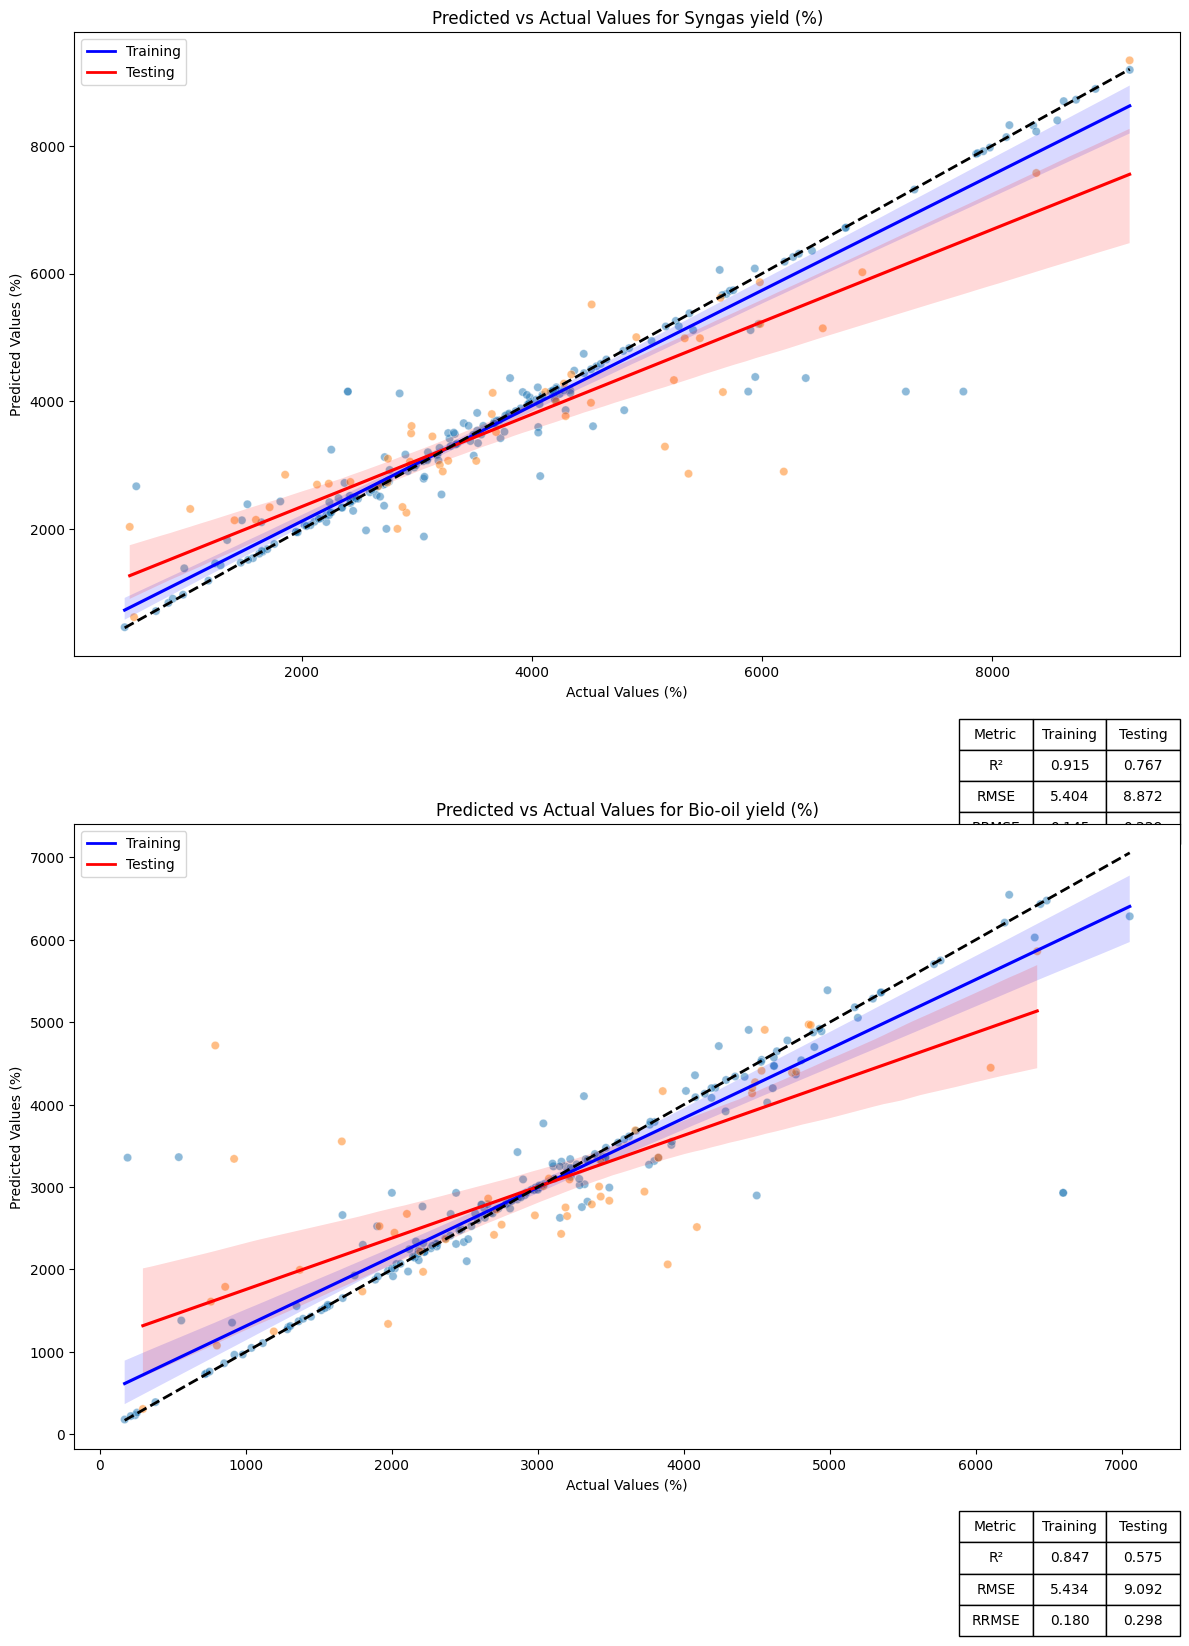

In [ ]:
all_feature_columns = [
    'Carbon content (wt%)',
    'Hydrogen content (wt%)',
    'Nitrogen content (wt%)',
    'Oxygen content (wt%)',
    'Sulfur content (wt%)',
    'Volatile matter (wt%)',
    'Fixed carbon (wt%)',
    'Ash content (wt%)',
    'Reaction temperature (°C)',
    'Microwave power (W)',
    'Reaction time (min)',
    'Microwave absorber percentage (%)',
    'Dielectric constant of absorber (ε′)',
    'Dielectric loss factor of absorber (ε“)'
]
target_columns = ['Syngas yield (%)' ,'Bio-oil yield (%)']
plot_predicted_vs_actual_multi(df,all_feature_columns,target_columns)

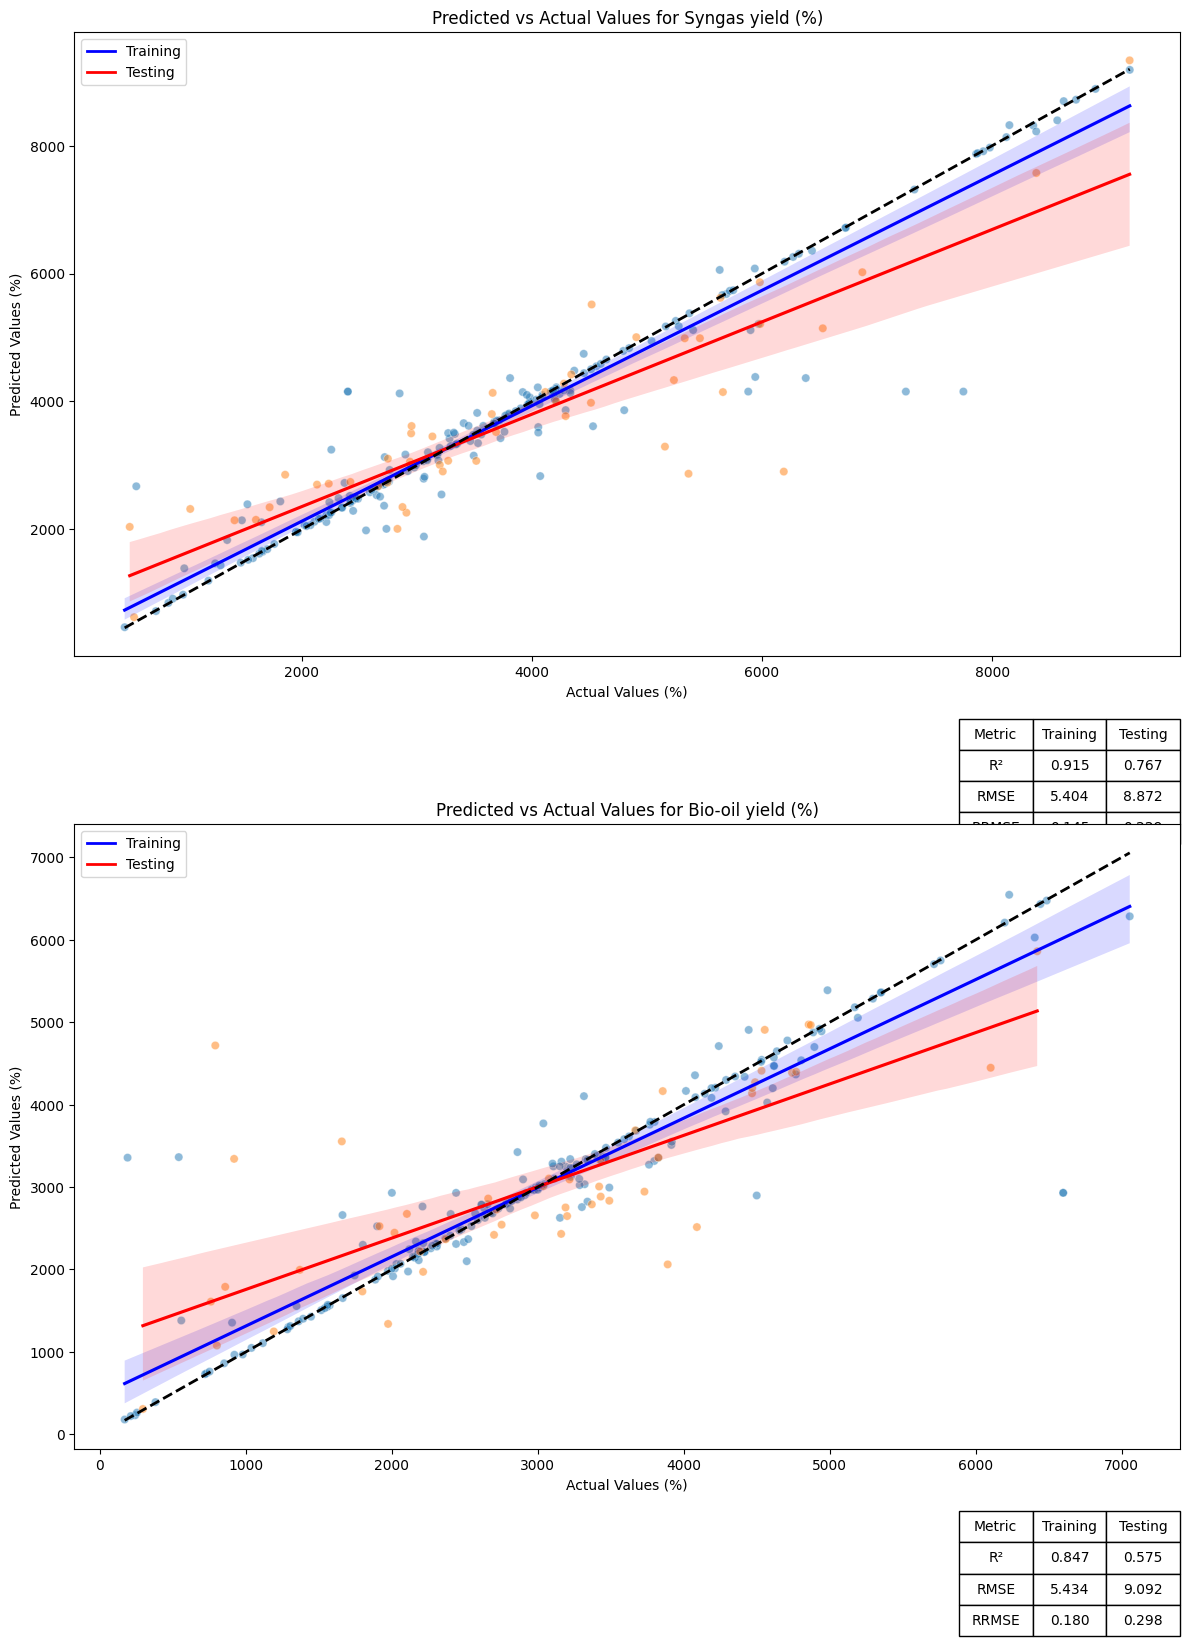

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# Define your dataframe `df` (replace with your actual data loading)
# For demonstration, let's assume `df` is already defined.

# Example of feature columns and multiple target columns
feature_columns = [
    'Carbon content (wt%)',
    'Hydrogen content (wt%)',
    'Nitrogen content (wt%)',
    'Oxygen content (wt%)',
    'Sulfur content (wt%)',
    'Volatile matter (wt%)',
    'Fixed carbon (wt%)',
    'Ash content (wt%)',
    'Reaction temperature (°C)',
    'Microwave power (W)',
    'Reaction time (min)',
    'Microwave absorber percentage (%)',
    'Dielectric constant of absorber (ε′)',
    'Dielectric loss factor of absorber (ε“)'
]

target_columns = [
    'Syngas yield (%)',  # Example target column 1
    'Bio-oil yield (%)'  # Example target column 3
    # Add more target columns as needed
]

def plot_predicted_vs_actual_multi(df, feature_columns, target_columns):
    num_cols = len(target_columns)
    fig, axs = plt.subplots(num_cols, 1, figsize=(12, 8*num_cols))

    for idx, target_column in enumerate(target_columns):
        # Assign the feature columns to X and the target column to y
        X = df[feature_columns].values
        y = df[target_column].values

        # Split the dataset into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Standardize the features
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        # Create and train the SVR model
        svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
        svr.fit(X_train, y_train)

        # Make predictions
        y_train_pred = svr.predict(X_train)
        y_test_pred = svr.predict(X_test)

        # Calculate R²
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)

        # Calculate RMSE
        rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
        rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

        # Calculate RRMSE
        rrmse_train = rmse_train / np.mean(y_train)
        rrmse_test = rmse_test / np.mean(y_test)

        # Convert actual and predicted values to percentages for plotting
        y_train_percentage = y_train * 100
        y_train_pred_percentage = y_train_pred * 100
        y_test_percentage = y_test * 100
        y_test_pred_percentage = y_test_pred * 100

        # Combine data into a DataFrame for plotting with seaborn
        df_plot = pd.DataFrame({
            'Actual': np.concatenate((y_train_percentage, y_test_percentage)),
            'Predicted': np.concatenate((y_train_pred_percentage, y_test_pred_percentage)),
            'Dataset': ['Training'] * len(y_train_percentage) + ['Testing'] * len(y_test_percentage)
        })

        # Plot on the respective subplot
        ax = axs[idx]
        sns.scatterplot(data=df_plot, x='Actual', y='Predicted', hue='Dataset', alpha=0.5, ax=ax)

        # Training data trend line and confidence interval
        sns.regplot(data=df_plot[df_plot['Dataset'] == 'Training'], x='Actual', y='Predicted', scatter=False, color='blue', ax=ax)

        # Testing data trend line and confidence interval
        sns.regplot(data=df_plot[df_plot['Dataset'] == 'Testing'], x='Actual', y='Predicted', scatter=False, color='red', ax=ax)

        # Add diagonal line
        ax.plot([min(y) * 100, max(y) * 100], [min(y) * 100, max(y) * 100], 'k--', lw=2)

        # Add labels and title with target column
        ax.set_xlabel('Actual Values (%)')
        ax.set_ylabel('Predicted Values (%)')
        ax.set_title(f'Predicted vs Actual Values for {target_column}')

        # Create custom legend with both training and testing labels
        custom_lines = [plt.Line2D([0], [0], color='blue', lw=2),
                        plt.Line2D([0], [0], color='red', lw=2)]
        ax.legend(custom_lines, ['Training', 'Testing'])

        # Add table with performance metrics
        table_data = [['R²', f'{r2_train:.3f}', f'{r2_test:.3f}'],
                      ['RMSE', f'{rmse_train:.3f}', f'{rmse_test:.3f}'],
                      ['RRMSE', f'{rrmse_train:.3f}', f'{rrmse_test:.3f}']]
        table = ax.table(cellText=table_data,
                         colLabels=['Metric', 'Training', 'Testing'],
                         cellLoc='center',
                         loc='bottom',
                         bbox=[0.8, -0.3, 0.2, 0.2])  # Adjust bbox to control position and size

        # Adjust layout to make room for the table
        fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.3)

        # Reduce font size for the table
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1, 1.5)  # Scale the table size

    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming `df`, `feature_columns`, and `target_columns` are defined appropriately
plot_predicted_vs_actual_multi(df, feature_columns, target_columns)


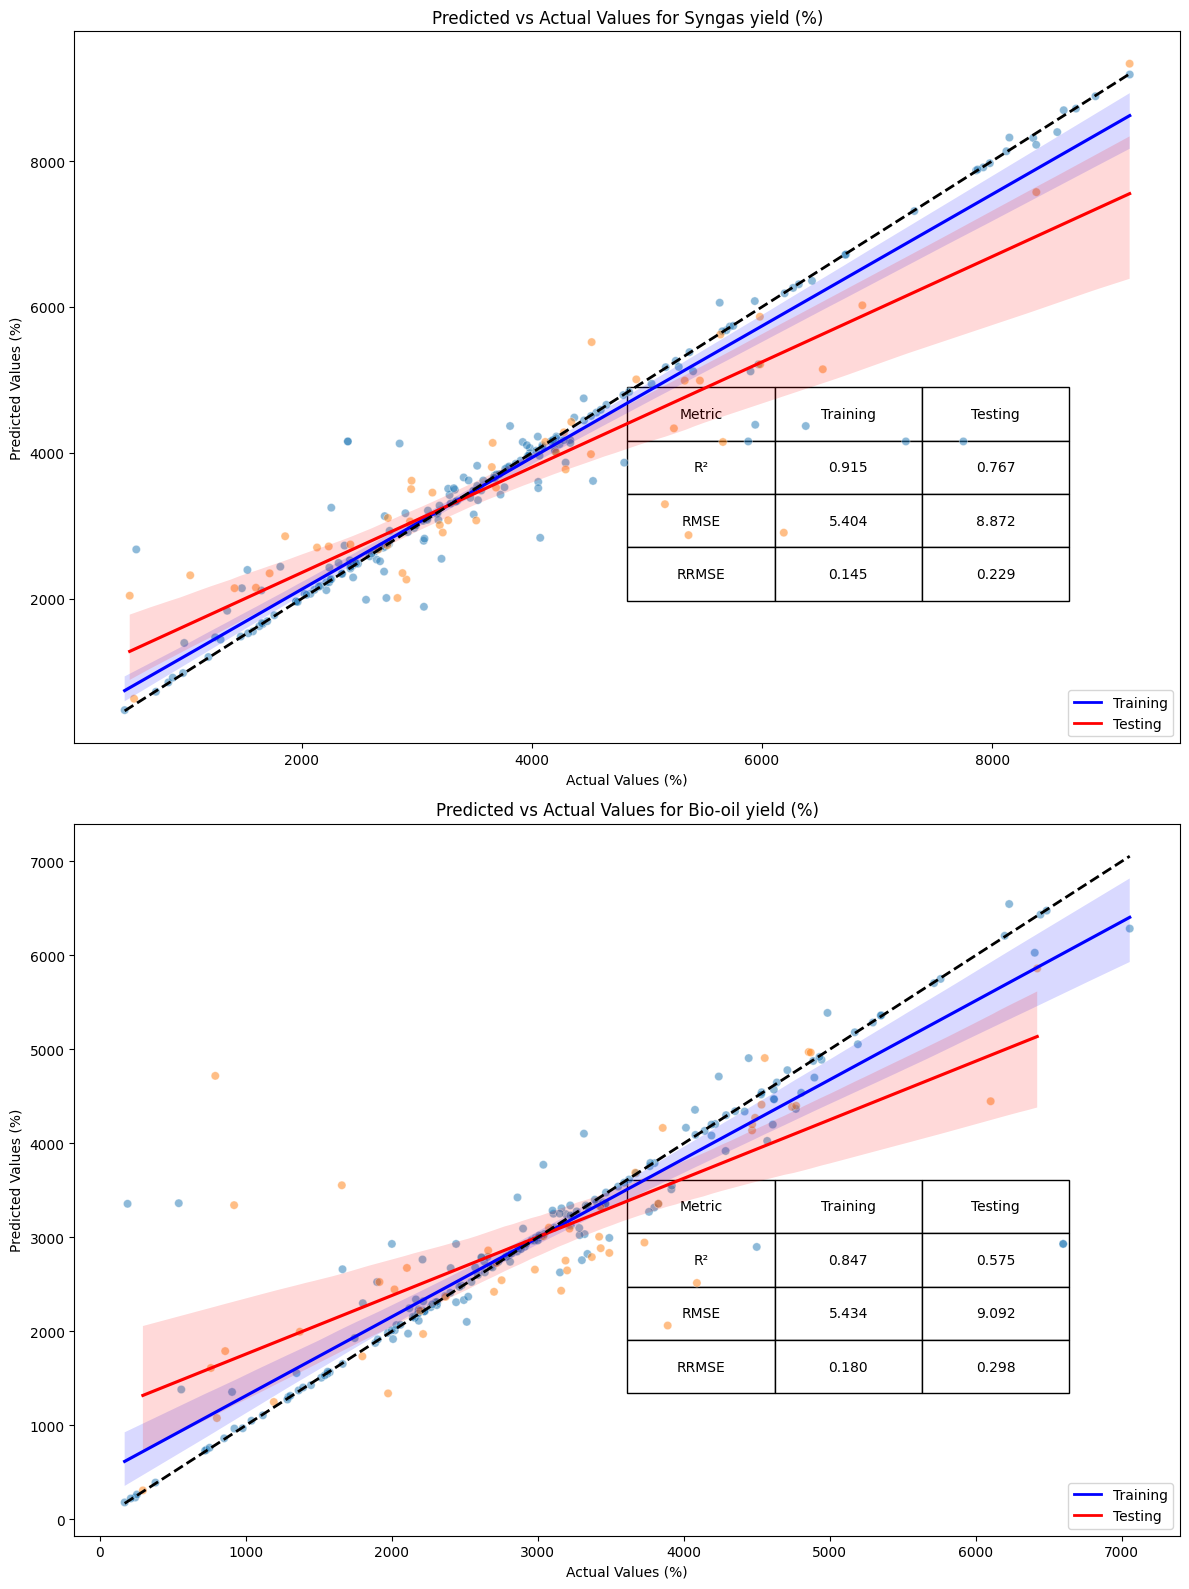

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

def plot_predicted_vs_actual_multi(df, feature_columns, target_columns):
    num_cols = len(target_columns)
    fig, axs = plt.subplots(num_cols, 1, figsize=(12, 8*num_cols))

    for idx, target_column in enumerate(target_columns):
        # Assign the feature columns to X and the target column to y
        X = df[feature_columns].values
        y = df[target_column].values

        # Split the dataset into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Standardize the features
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        # Create and train the SVR model
        svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
        svr.fit(X_train, y_train)

        # Make predictions
        y_train_pred = svr.predict(X_train)
        y_test_pred = svr.predict(X_test)

        # Calculate R²
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)

        # Calculate RMSE
        rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
        rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

        # Calculate RRMSE
        rrmse_train = rmse_train / np.mean(y_train)
        rrmse_test = rmse_test / np.mean(y_test)

        # Convert actual and predicted values to percentages for plotting
        y_train_percentage = y_train * 100
        y_train_pred_percentage = y_train_pred * 100
        y_test_percentage = y_test * 100
        y_test_pred_percentage = y_test_pred * 100

        # Combine data into a DataFrame for plotting with seaborn
        df_plot = pd.DataFrame({
            'Actual': np.concatenate((y_train_percentage, y_test_percentage)),
            'Predicted': np.concatenate((y_train_pred_percentage, y_test_pred_percentage)),
            'Dataset': ['Training'] * len(y_train_percentage) + ['Testing'] * len(y_test_percentage)
        })

        # Plot on the respective subplot
        ax = axs[idx]
        sns.scatterplot(data=df_plot, x='Actual', y='Predicted', hue='Dataset', alpha=0.5, ax=ax)

        # Training data trend line and confidence interval
        sns.regplot(data=df_plot[df_plot['Dataset'] == 'Training'], x='Actual', y='Predicted', scatter=False, color='blue', ax=ax)

        # Testing data trend line and confidence interval
        sns.regplot(data=df_plot[df_plot['Dataset'] == 'Testing'], x='Actual', y='Predicted', scatter=False, color='red', ax=ax)

        # Add diagonal line
        ax.plot([min(y) * 100, max(y) * 100], [min(y) * 100, max(y) * 100], 'k--', lw=2)

        # Add labels and title with target column
        ax.set_xlabel('Actual Values (%)')
        ax.set_ylabel('Predicted Values (%)')
        ax.set_title(f'Predicted vs Actual Values for {target_column}')

        # Create custom legend with both training and testing labels
        custom_lines = [plt.Line2D([0], [0], color='blue', lw=2),
                        plt.Line2D([0], [0], color='red', lw=2)]
        ax.legend(custom_lines, ['Training', 'Testing'], loc='lower right')

        # Add table with performance metrics
        table_data = [['R²', f'{r2_train:.3f}', f'{r2_test:.3f}'],
                      ['RMSE', f'{rmse_train:.3f}', f'{rmse_test:.3f}'],
                      ['RRMSE', f'{rrmse_train:.3f}', f'{rrmse_test:.3f}']]
        table = ax.table(cellText=table_data,
                         colLabels=['Metric', 'Training', 'Testing'],
                         cellLoc='center',
                         loc='center right',  # Adjusted to center right
                         bbox=[0.5, 0.2, 0.4, 0.3])  # Adjust bbox to control position and size

        # Adjust table font size and style
        table.auto_set_font_size(False)
        table.set_fontsize(10)

    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming `df`, `feature_columns`, and `target_columns` are defined appropriately
plot_predicted_vs_actual_multi(df, feature_columns, target_columns)


Here is the final result, as a function

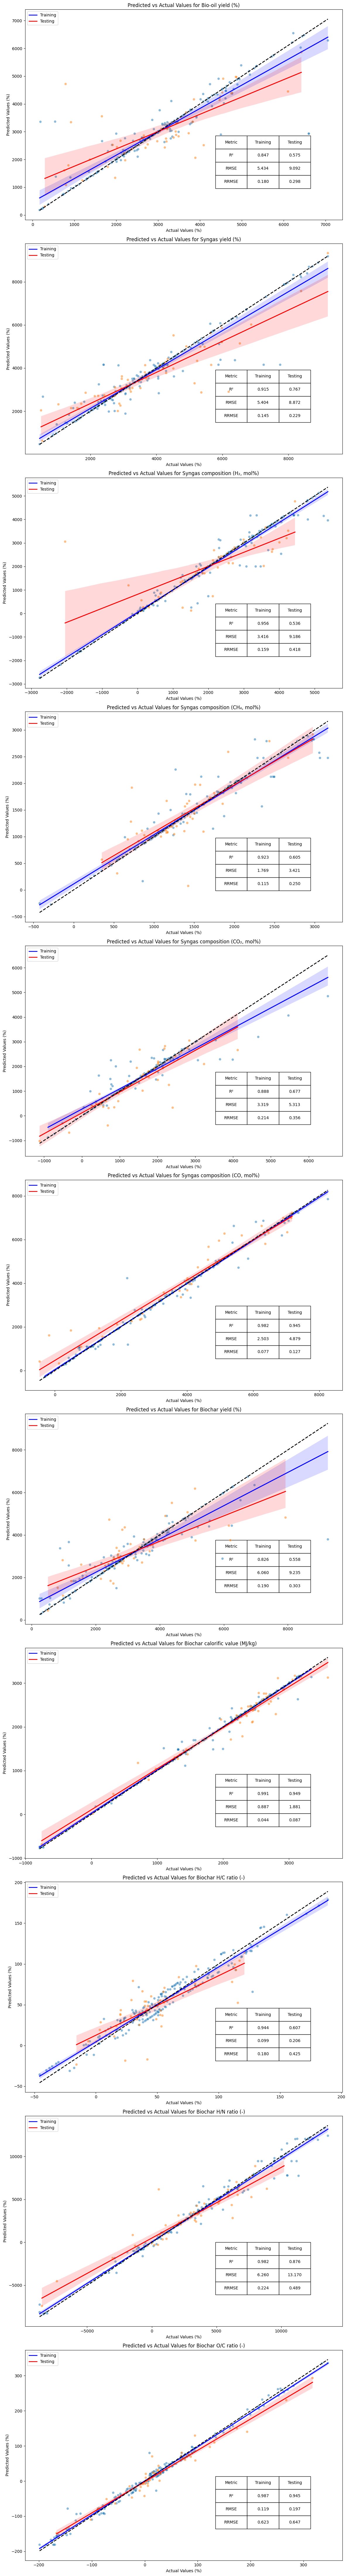

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

def plot_predicted_vs_actual_multi(df, feature_columns, target_columns):
    num_cols = len(target_columns)
    fig, axs = plt.subplots(num_cols, 1, figsize=(12, 8*num_cols))

    for idx, target_column in enumerate(target_columns):
        # Assign the feature columns to X and the target column to y
        X = df[feature_columns].values
        y = df[target_column].values

        # Split the dataset into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Standardize the features
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        # Create and train the SVR model
        svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
        svr.fit(X_train, y_train)

        # Make predictions
        y_train_pred = svr.predict(X_train)
        y_test_pred = svr.predict(X_test)

        # Calculate R²
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)

        # Calculate RMSE
        rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
        rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

        # Calculate RRMSE
        rrmse_train = rmse_train / np.mean(y_train)
        rrmse_test = rmse_test / np.mean(y_test)

        # Convert actual and predicted values to percentages for plotting
        y_train_percentage = y_train * 100
        y_train_pred_percentage = y_train_pred * 100
        y_test_percentage = y_test * 100
        y_test_pred_percentage = y_test_pred * 100

        # Combine data into a DataFrame for plotting with seaborn
        df_plot = pd.DataFrame({
            'Actual': np.concatenate((y_train_percentage, y_test_percentage)),
            'Predicted': np.concatenate((y_train_pred_percentage, y_test_pred_percentage)),
            'Dataset': ['Training'] * len(y_train_percentage) + ['Testing'] * len(y_test_percentage)
        })

        # Plot on the respective subplot
        ax = axs[idx]
        sns.scatterplot(data=df_plot, x='Actual', y='Predicted', hue='Dataset', alpha=0.5, ax=ax)

        # Training data trend line and confidence interval
        sns.regplot(data=df_plot[df_plot['Dataset'] == 'Training'], x='Actual', y='Predicted', scatter=False, color='blue', ax=ax)

        # Testing data trend line and confidence interval
        sns.regplot(data=df_plot[df_plot['Dataset'] == 'Testing'], x='Actual', y='Predicted', scatter=False, color='red', ax=ax)

        # Add diagonal line
        ax.plot([min(y) * 100, max(y) * 100], [min(y) * 100, max(y) * 100], 'k--', lw=2)

        # Add labels and title with target column
        ax.set_xlabel('Actual Values (%)')
        ax.set_ylabel('Predicted Values (%)')
        ax.set_title(f'Predicted vs Actual Values for {target_column}')

        # Create custom legend with both training and testing labels
        custom_lines = [plt.Line2D([0], [0], color='blue', lw=2),
                        plt.Line2D([0], [0], color='red', lw=2)]
        ax.legend(custom_lines, ['Training', 'Testing'], loc='upper left')

        # Add table with performance metrics
        table_data = [['R²', f'{r2_train:.3f}', f'{r2_test:.3f}'],
                      ['RMSE', f'{rmse_train:.3f}', f'{rmse_test:.3f}'],
                      ['RRMSE', f'{rrmse_train:.3f}', f'{rrmse_test:.3f}']]
        table = ax.table(cellText=table_data,
                         colLabels=['Metric', 'Training', 'Testing'],
                         cellLoc='center',
                         loc='bottom right',  # Adjusted to bottom right
                         bbox=[0.6, 0.15, 0.3, 0.25])  # Adjust bbox to control position and size

        # Adjust table font size and style
        table.auto_set_font_size(False)
        table.set_fontsize(10)

    plt.tight_layout()
     # Save the figure to a file if output_file is provided
    if output_file:
        plt.savefig(output_file)
    plt.show()

# Example usage:
# Assuming `df`, `feature_columns`, and `target_columns` are defined appropriately


feature_columns = [
    'Carbon content (wt%)',
    'Hydrogen content (wt%)',
    'Nitrogen content (wt%)',
    'Oxygen content (wt%)',
    'Sulfur content (wt%)',
    'Volatile matter (wt%)',
    'Fixed carbon (wt%)',
    'Ash content (wt%)',
    'Reaction temperature (°C)',
    'Microwave power (W)',
    'Reaction time (min)',
    'Microwave absorber percentage (%)',
    'Dielectric constant of absorber (ε′)',
    'Dielectric loss factor of absorber (ε“)'
]


target_columns = ['Bio-oil yield (%)',
       'Syngas yield (%)', 'Syngas composition (H₂, mol%)',
       'Syngas composition (CH₄, mol%)', 'Syngas composition (CO₂, mol%)',
       'Syngas composition (CO, mol%)', 'Biochar yield (%)',
       'Biochar calorific value (MJ/kg)', 'Biochar H/C ratio (-)',
       'Biochar H/N ratio (-)', 'Biochar O/C ratio (-)']

output_file = 'SVR_predicted_vs_actual_multi.png'
plot_predicted_vs_actual_multi(df, feature_columns, target_columns, output_file)


Here is the section when legend is added

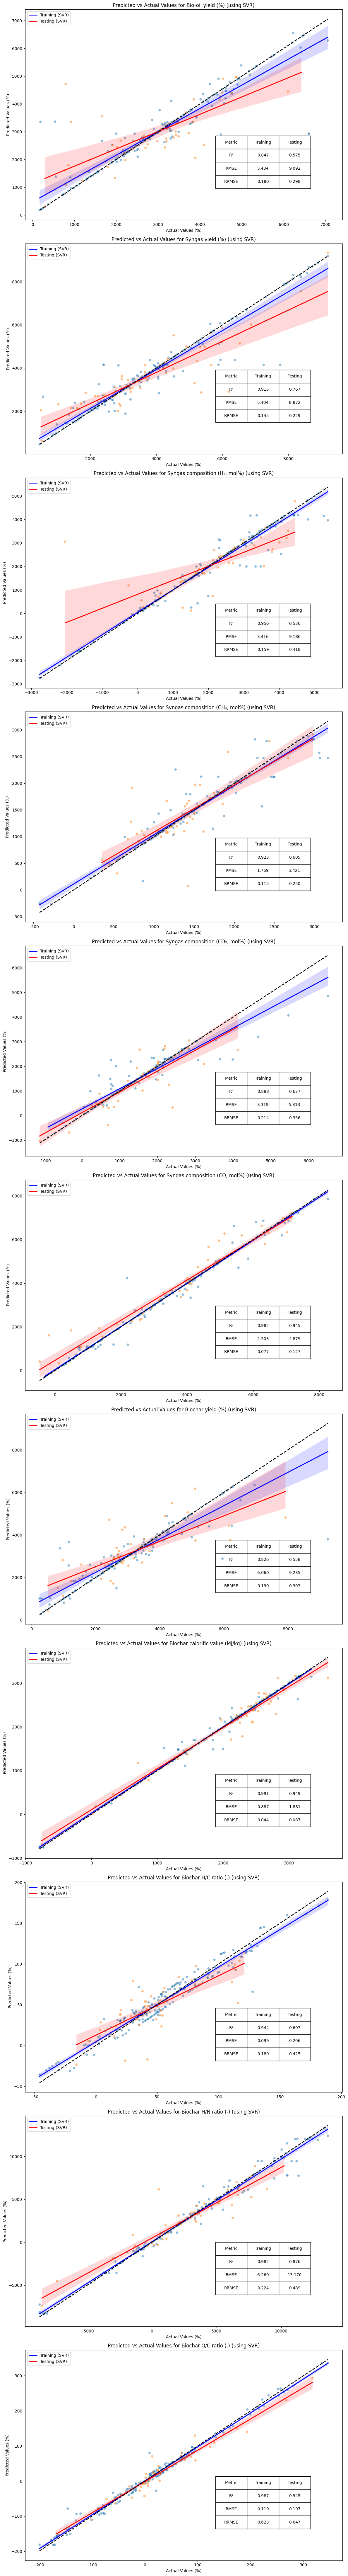

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

def plot_predicted_vs_actual_multi(df, feature_columns, target_columns, output_file=None):
    num_cols = len(target_columns)
    fig, axs = plt.subplots(num_cols, 1, figsize=(12, 8*num_cols))

    for idx, target_column in enumerate(target_columns):
        # Assign the feature columns to X and the target column to y
        X = df[feature_columns].values
        y = df[target_column].values

        # Split the dataset into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Standardize the features
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        # Create and train the SVR model
        svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
        svr.fit(X_train, y_train)

        # Make predictions
        y_train_pred = svr.predict(X_train)
        y_test_pred = svr.predict(X_test)

        # Calculate R²
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)

        # Calculate RMSE
        rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
        rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

        # Calculate RRMSE
        rrmse_train = rmse_train / np.mean(y_train)
        rrmse_test = rmse_test / np.mean(y_test)

        # Convert actual and predicted values to percentages for plotting
        y_train_percentage = y_train * 100
        y_train_pred_percentage = y_train_pred * 100
        y_test_percentage = y_test * 100
        y_test_pred_percentage = y_test_pred * 100

        # Combine data into a DataFrame for plotting with seaborn
        df_plot = pd.DataFrame({
            'Actual': np.concatenate((y_train_percentage, y_test_percentage)),
            'Predicted': np.concatenate((y_train_pred_percentage, y_test_pred_percentage)),
            'Dataset': ['Training'] * len(y_train_percentage) + ['Testing'] * len(y_test_percentage)
        })

        # Plot on the respective subplot
        ax = axs[idx]
        sns.scatterplot(data=df_plot, x='Actual', y='Predicted', hue='Dataset', alpha=0.5, ax=ax)

        # Training data trend line and confidence interval
        sns.regplot(data=df_plot[df_plot['Dataset'] == 'Training'], x='Actual', y='Predicted', scatter=False, color='blue', ax=ax)

        # Testing data trend line and confidence interval
        sns.regplot(data=df_plot[df_plot['Dataset'] == 'Testing'], x='Actual', y='Predicted', scatter=False, color='red', ax=ax)

        # Add diagonal line
        ax.plot([min(y) * 100, max(y) * 100], [min(y) * 100, max(y) * 100], 'k--', lw=2)

        # Add labels and title with target column
        ax.set_xlabel('Actual Values (%)')
        ax.set_ylabel('Predicted Values (%)')
        ax.set_title(f'Predicted vs Actual Values for {target_column} (using SVR)')

        # Create custom legend with both training and testing labels
        custom_lines = [plt.Line2D([0], [0], color='blue', lw=2),
                        plt.Line2D([0], [0], color='red', lw=2)]
        ax.legend(custom_lines, ['Training (SVR)', 'Testing (SVR)'], loc='upper left')

        # Add table with performance metrics
        table_data = [['R²', f'{r2_train:.3f}', f'{r2_test:.3f}'],
                      ['RMSE', f'{rmse_train:.3f}', f'{rmse_test:.3f}'],
                      ['RRMSE', f'{rrmse_train:.3f}', f'{rrmse_test:.3f}']]
        table = ax.table(cellText=table_data,
                         colLabels=['Metric', 'Training', 'Testing'],
                         cellLoc='center',
                         loc='bottom right',  # Adjusted to bottom right
                         bbox=[0.6, 0.15, 0.3, 0.25])  # Adjust bbox to control position and size

        # Adjust table font size and style
        table.auto_set_font_size(False)
        table.set_fontsize(10)

    plt.tight_layout()

    # Save the figure to a file if output_file is provided
    if output_file:
        plt.savefig(output_file)

    plt.show()

# Example usage:
# Assuming `df`, `feature_columns`, and `target_columns` are defined appropriately
# Also assuming `output_file` is the file path where you want to save the plot
feature_columns = [
    'Carbon content (wt%)',
    'Hydrogen content (wt%)',
    'Nitrogen content (wt%)',
    'Oxygen content (wt%)',
    'Sulfur content (wt%)',
    'Volatile matter (wt%)',
    'Fixed carbon (wt%)',
    'Ash content (wt%)',
    'Reaction temperature (°C)',
    'Microwave power (W)',
    'Reaction time (min)',
    'Microwave absorber percentage (%)',
    'Dielectric constant of absorber (ε′)',
    'Dielectric loss factor of absorber (ε“)'
]

target_columns = [
    'Bio-oil yield (%)',
    'Syngas yield (%)',
    'Syngas composition (H₂, mol%)',
    'Syngas composition (CH₄, mol%)',
    'Syngas composition (CO₂, mol%)',
    'Syngas composition (CO, mol%)',
    'Biochar yield (%)',
    'Biochar calorific value (MJ/kg)',
    'Biochar H/C ratio (-)',
    'Biochar H/N ratio (-)',
    'Biochar O/C ratio (-)'
]

output_file = 'SVR_predicted_vs_actual_multi.png'
plot_predicted_vs_actual_multi(df, feature_columns, target_columns, output_file)
